In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os 
import sys

projRootPath =  os.path.abspath(os.path.join('.' ,"../.."))
print("Project root path is: ", projRootPath)
sys.path.append(projRootPath)

from src.utils.path_manipulation import contains_filetype

# modules for visuals
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# modules for data processing
import numpy as np
from scipy import signal
from scipy.io import wavfile
import wave
import struct

# modules for data mining
import sklearn

# and IPython.display for audio output
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

from pydub import AudioSegment

Project root path is:  D:\Programming\AudioMining


In [3]:
# Get data files
dataDirName = "data"
rawDataDirName = "converted_wav"
className1 = "violin"
className2 = "guitar"
data_path1 = os.path.join(projRootPath, dataDirName, rawDataDirName, className1)
data_path2 = os.path.join(projRootPath, dataDirName, rawDataDirName, className2)

print(data_path1)
print(data_path2)
root_paths = []

# Get all files from data_path 
# r=root, d=directories, f = files
(_, d, allFiles) = next(os.walk(data_path1))
wavFiles1 = [f for f in allFiles if f.endswith(".wav")]

(_, d, allFiles) = next(os.walk(data_path2))
wavFiles2 = [f for f in allFiles if f.endswith(".wav")]


D:\Programming\AudioMining\data\converted_wav\violin
D:\Programming\AudioMining\data\converted_wav\guitar


In [4]:
sound1 = AudioSegment.from_file(os.path.join(data_path1, wavFiles1[3]))
sound2 = AudioSegment.from_file(os.path.join(data_path2, wavFiles2[2]))
combined = sound1.overlay(sound2)

testDataDir = "test_data"
saveDir = os.path.join(projRootPath, dataDirName, testDataDir, "noisy_sine")
combined.export(os.path.join(saveDir, "mix_test.wav"), format='wav')

<_io.BufferedRandom name='D:\\Programming\\AudioMining\\data\\test_data\\noisy_sine\\mix_test.wav'>

In [5]:
x, fs = librosa.load(os.path.join(saveDir, "mix_test.wav"), sr=None)
IPython.display.Audio(x, rate=fs)

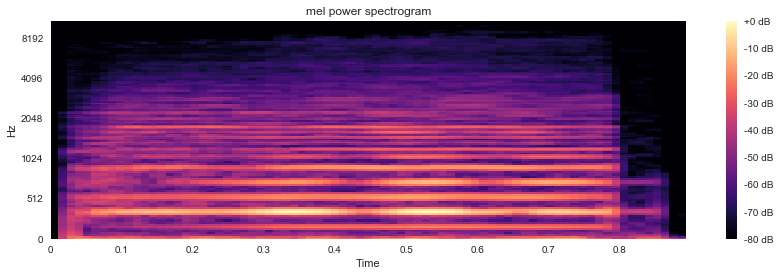

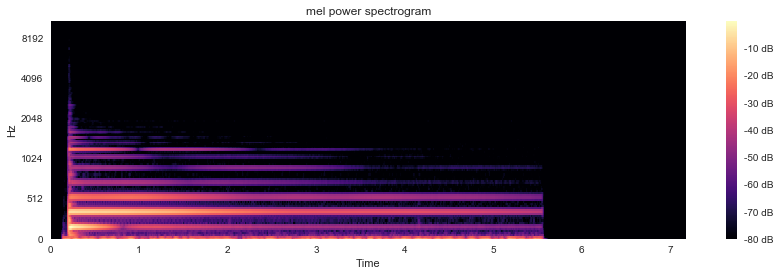

In [53]:
fs1, data1 = wavfile.read(os.path.join(data_path1, wavFiles1[3]))
fs2, data2 = wavfile.read(os.path.join(data_path2, wavFiles2[2]))

S = librosa.feature.melspectrogram(data1.astype(float), sr=fs1, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=fs, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()
plt.show()

S = librosa.feature.melspectrogram(data2.astype(float), sr=fs2, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=fs, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()
plt.show()

In [50]:
# Alternative

fs1, data1 = wavfile.read(os.path.join(data_path1, wavFiles1[3]))
fs2, data2 = wavfile.read(os.path.join(data_path2, wavFiles2[2]))

assert fs1 == fs2

# pad with 0 so they are the same length
if len(data1) < len(data2):
    pad_len = len(data2) - len(data1)
    pad_arr = np.zeros((1, pad_len))[0].astype(int)
    data1 = np.concatenate((data1, pad_arr))
elif len(data1) > len(data2):
    pad_len = len(data1) - len(data2)
    pad_arr = np.zeros((1, pad_len))[0].astype(int)
    data2 = np.concatenate((data2, pad_arr))


result = 0.5 * data1 + 0.5 * data2
IPython.display.Audio(result, rate=fs1)

[0 0 0 ... 4 4 4]
